# Project Name: Temperature Forecast Analysis

About Project: This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model which is consists of summer data from 2013 to 2017.Here we need to build Machine Learning model which can used to predict two outputs (i.e. next-day maximum and minimum air temperatures).

In [358]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [359]:
#Import Dataset
ds= pd.read_csv('temperature_forecast.csv')
ds.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [360]:
df= pd.DataFrame(data=ds)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [361]:
df.shape

(7752, 25)

In [362]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [364]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [365]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Observations: We can see that most of columns such as Present_Tmax, Present_Tmin, lat, lon etc. count is less that means there are Null values present. Also SD for almost all columns are less except columns LDAPS_LH ,DEM and Solar radiation.  

In [366]:
#Checking for Null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Observations: Almost in maximum columns Null values present.

In [367]:
#Now for dtype as float64 columns we will replace Null values by mean

for i in df.columns:
    if df[i].dtypes== 'float64':
        if df[i].isnull().sum() != 0:
            df[i].fillna(df[i].mean(), inplace=True)

In [368]:
#Removing Null values from Date column
df.dropna(inplace= True)

In [369]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

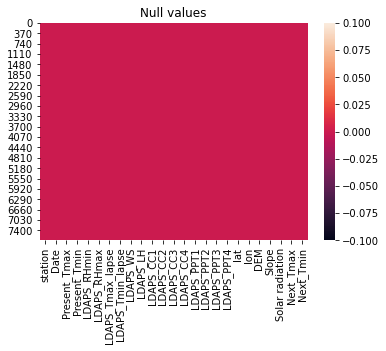

In [370]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observations: Now we can see that no null values are present.

# Feature Engineering

In [371]:
#Seperate year, month and day from Date column

df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Date'] = pd.DatetimeIndex(df['Date']).day

In [372]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Year
0,1.0,30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2.0,30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,3.0,30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,4.0,30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,5.0,30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013


# EDA

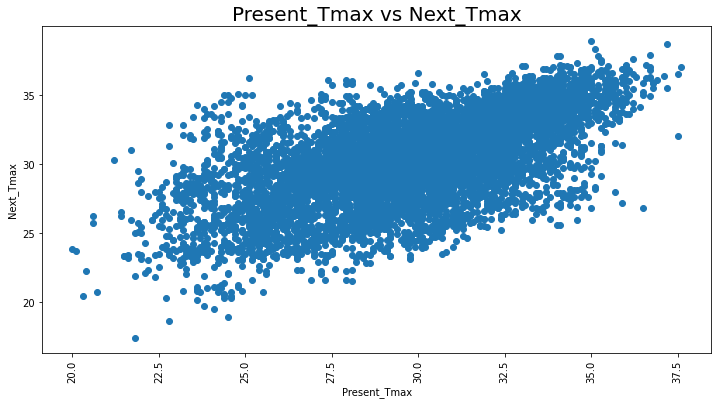

In [373]:
plt.figure(figsize=(12,6))
plt.scatter(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')
plt.title('Present_Tmax vs Next_Tmax', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that Next_Tmax increases linearly with Present_Tmax.

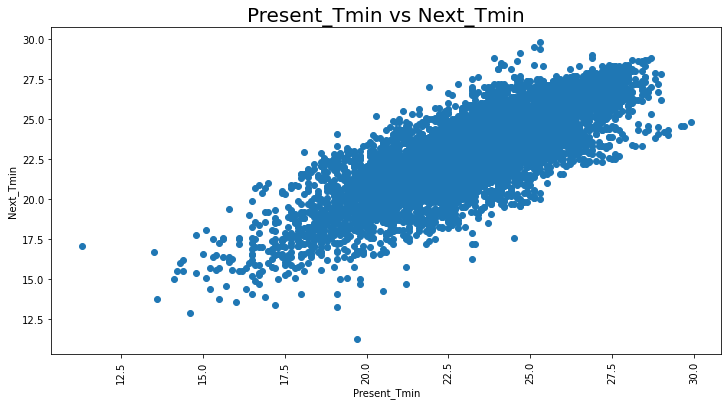

In [374]:
plt.figure(figsize=(12,6))
plt.scatter(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')
plt.title('Present_Tmin vs Next_Tmin', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that Next_Tmin increases linearly with Present_Tmin.

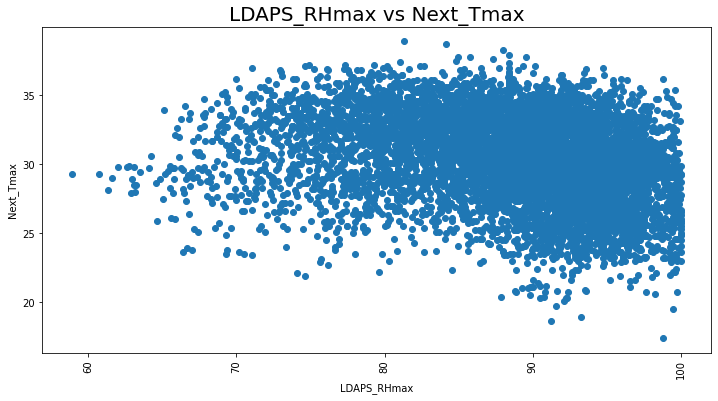

In [375]:
plt.figure(figsize=(12,6))
plt.scatter(df['LDAPS_RHmax'], df['Next_Tmax'])
plt.xlabel('LDAPS_RHmax')
plt.ylabel('Next_Tmax')
plt.title('LDAPS_RHmax vs Next_Tmax', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can that there is no much relationship between LDAPS_RHmax vs Next_Tmax.

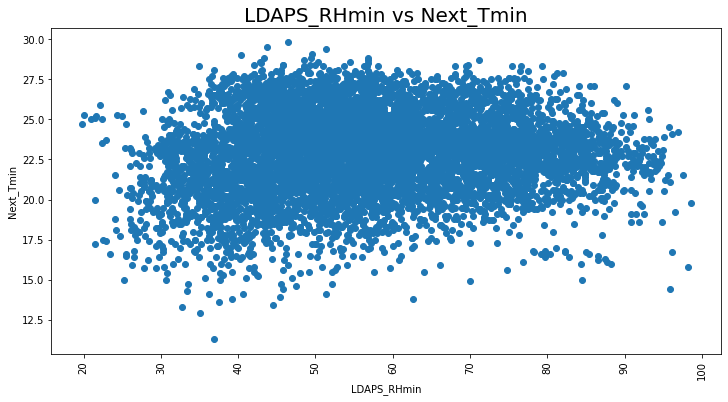

In [376]:
plt.figure(figsize=(12,6))
plt.scatter(df['LDAPS_RHmin'], df['Next_Tmin'])
plt.xlabel('LDAPS_RHmin')
plt.ylabel('Next_Tmin')
plt.title('LDAPS_RHmin vs Next_Tmin', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can that there is no much relationship between LDAPS_RHmin vs Next_Tmin.

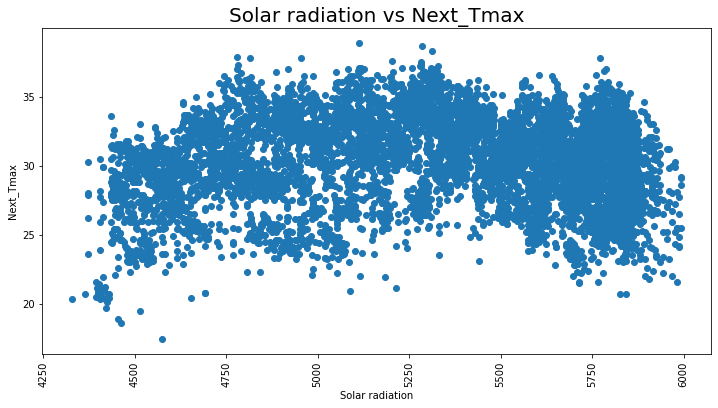

In [377]:
plt.figure(figsize=(12,6))
plt.scatter(df['Solar radiation'], df['Next_Tmax'])
plt.xlabel('Solar radiation')
plt.ylabel('Next_Tmax')
plt.title('Solar radiation vs Next_Tmax', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that Next_Tmax increases as Solar radiation increases upto 5250 and again Next_Tmax start decreasing.

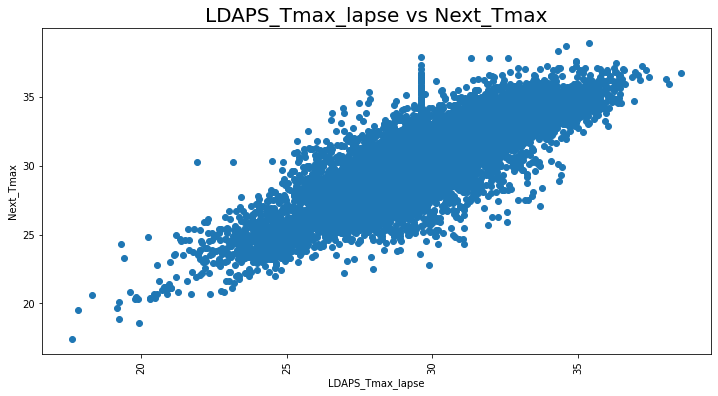

In [378]:
plt.figure(figsize=(12,6))
plt.scatter(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')
plt.title('LDAPS_Tmax_lapse vs Next_Tmax', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that Next_Tmax increases linearly with LDAPS_Tmax_lapse.

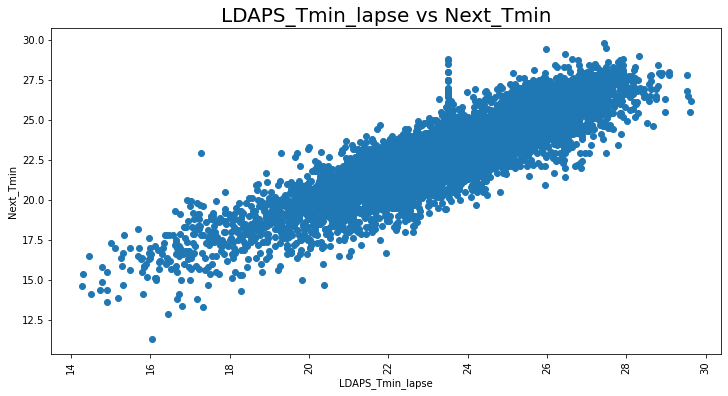

In [379]:
plt.figure(figsize=(12,6))
plt.scatter(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')
plt.title('LDAPS_Tmin_lapse vs Next_Tmin', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that Next_Tmin increases linearly with LDAPS_Tmin_lapse.

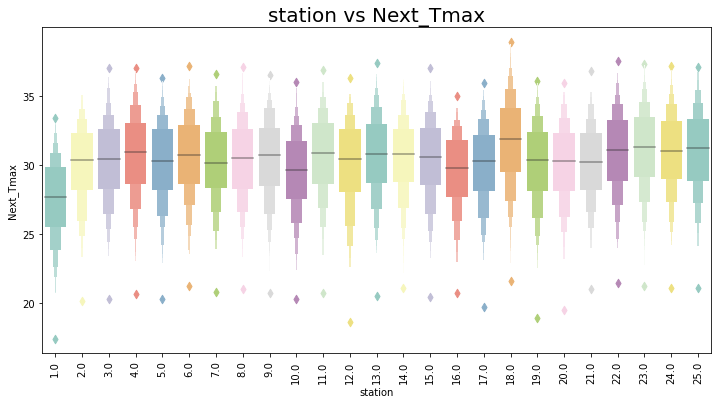

In [380]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['station'], df['Next_Tmax'], palette='Set3')
plt.title('station vs Next_Tmax', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: For station 1 having low Next_Tmax where as station 18 has maximum Next_Tmax.

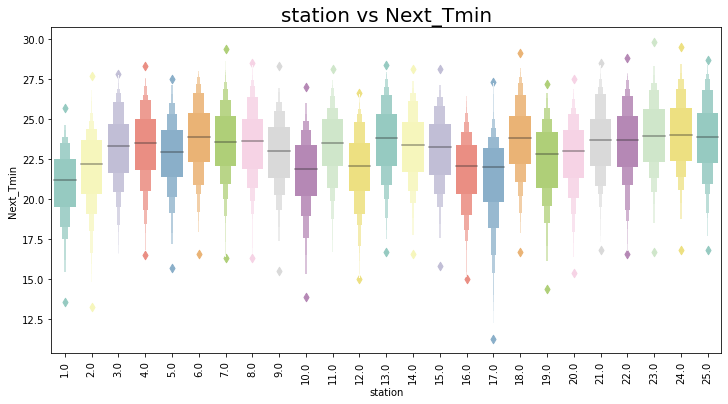

In [381]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['station'], df['Next_Tmin'], palette='Set3')
plt.title('station vs Next_Tmin', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: For station 1 and  17 having low Next_Tmin where as station 18 has maximum Next_Tmin.

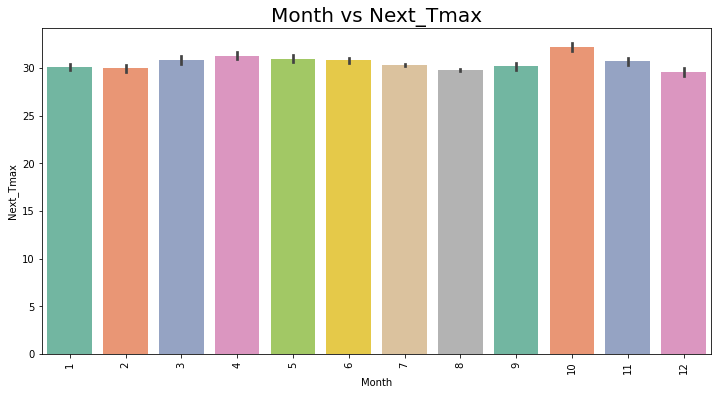

In [382]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Next_Tmax'], palette='Set2')
plt.title('Month vs Next_Tmax', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: There is highest Next_Tmax in 10th i.e. October month and lower in 12th i.e. December month.

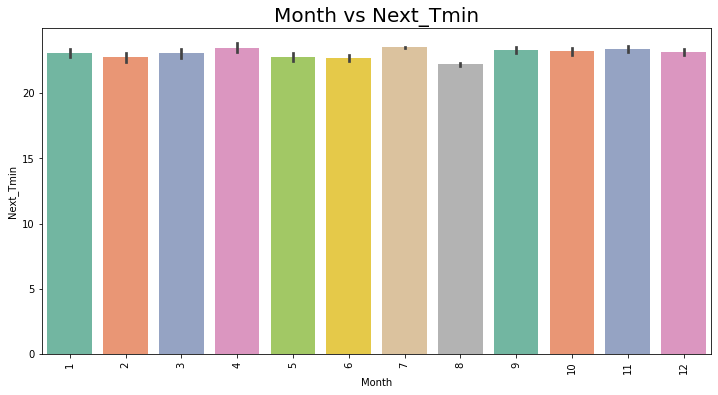

In [383]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Next_Tmin'], palette='Set2')
plt.title('Month vs Next_Tmin', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: There is highest Next_Tmin in 7th i.e. July month and lower in 8th i.e. August month.

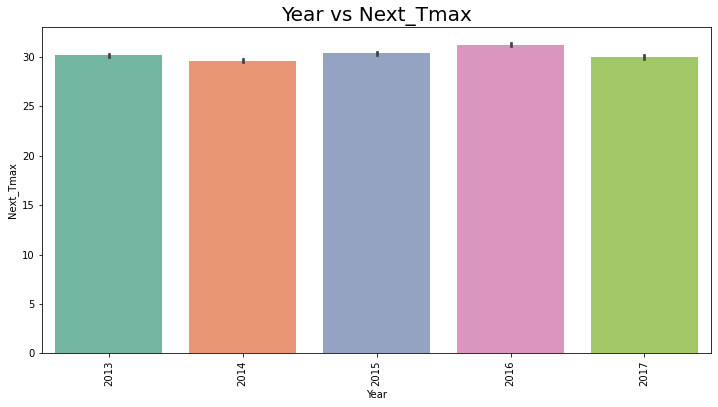

In [384]:
plt.figure(figsize=(12,6))
sns.barplot(df['Year'], df['Next_Tmax'], palette='Set2')
plt.title('Year vs Next_Tmax', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: In year 2016 there is highest Next_Tmax.

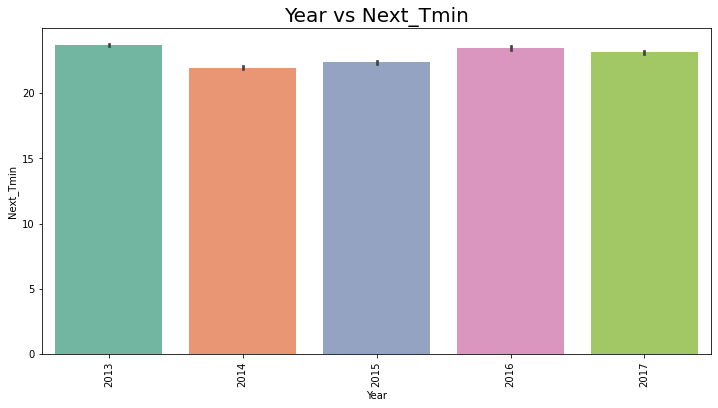

In [385]:
plt.figure(figsize=(12,6))
sns.barplot(df['Year'], df['Next_Tmin'], palette='Set2')
plt.title('Year vs Next_Tmin', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: In year 2014 there is lower Next_Tmin.

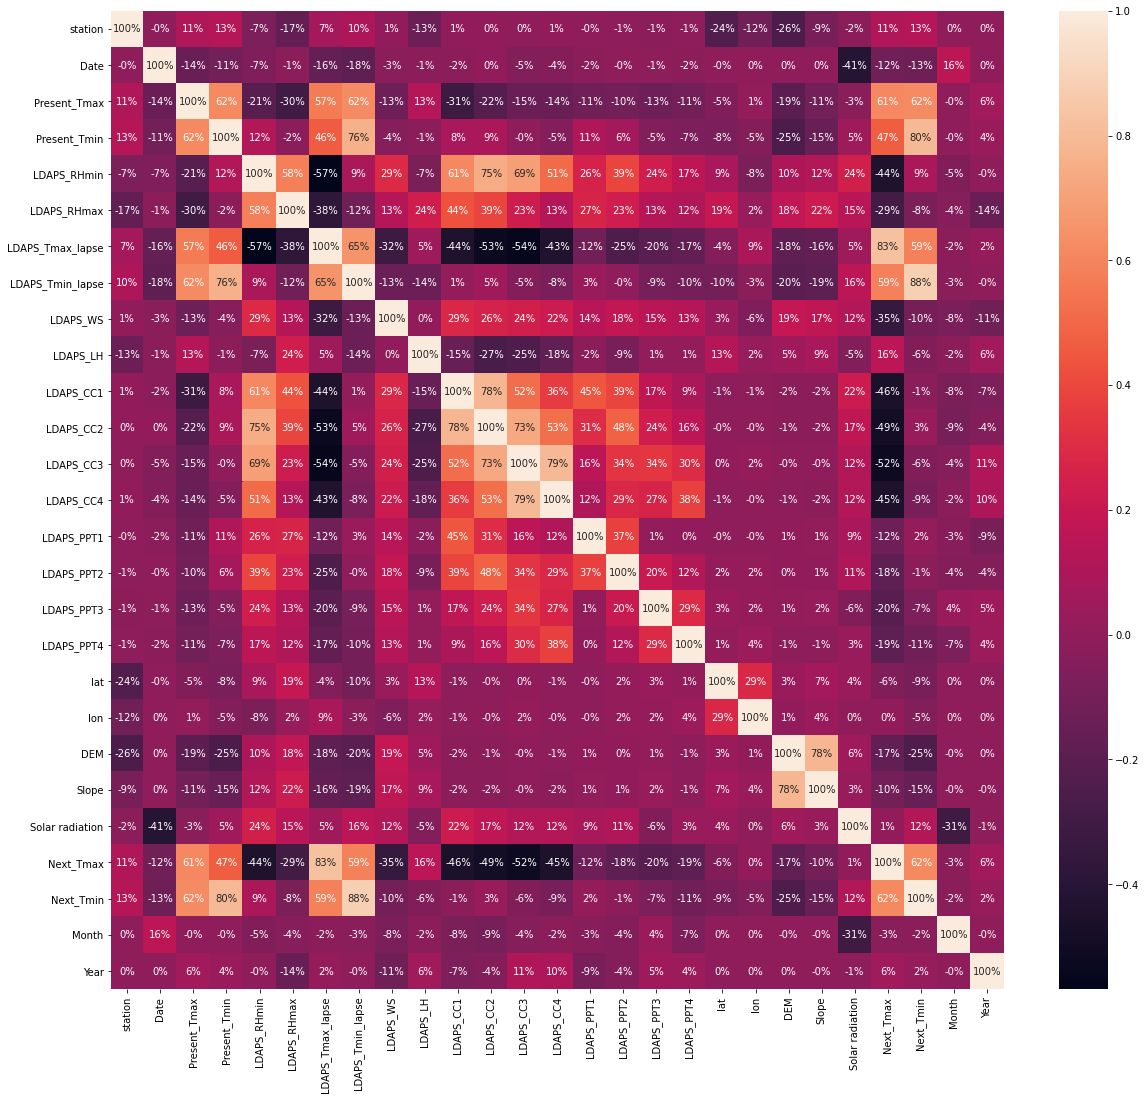

In [386]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: We can see that Next_Tmax is highly correlated with LDAPS_Tmax_lapse and Present_Tmax. Where as Next_Tmin is highly correlated with LDAPS_Tmin_lapse and Present_Tmin. 

station                 AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Date                 AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Present_Tmax         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Present_Tmin         AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
LDAPS_RHmin          AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
LDAPS_RHmax          AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
LDAPS_WS               AxesSubplot(0.125,0.518913;0.0824468x0.16413)
LDAPS_LH            AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
LDAPS_CC1           AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
LDAPS_CC2           AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
LDAPS_CC3           AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
LDAPS_CC4           AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
LDAPS_PPT1          AxesSubplot(0.

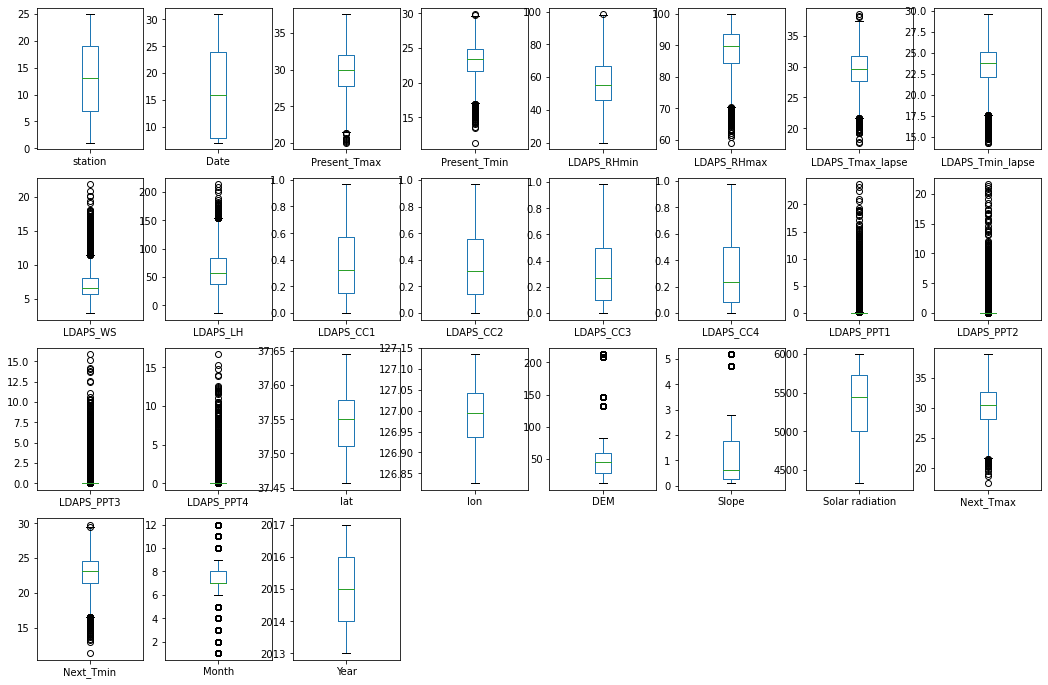

In [387]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: We can see that maximum columns such as LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2 etc  are having outliers.

In [388]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Year
0,1.0,30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2.0,30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,3.0,30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,4.0,30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,5.0,30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8,2017
7746,22.0,30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8,2017
7747,23.0,30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8,2017
7748,24.0,30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8,2017


In [389]:
df_new.shape

(6888, 27)

In [390]:
df.shape

(7750, 27)

Observations: We can see that almot 862 rows removed due to outliers.

In [391]:
#Splitting DATA

df= df_new
x= df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month,Year
0,1.0,30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,6,2013
1,2.0,30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,6,2013
2,3.0,30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,6,2013
3,4.0,30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,6,2013
4,5.0,30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,6,2013


In [392]:
y_max= df['Next_Tmax']
y_min= df['Next_Tmin']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D48E1A5EB0>,
      dtype=object)

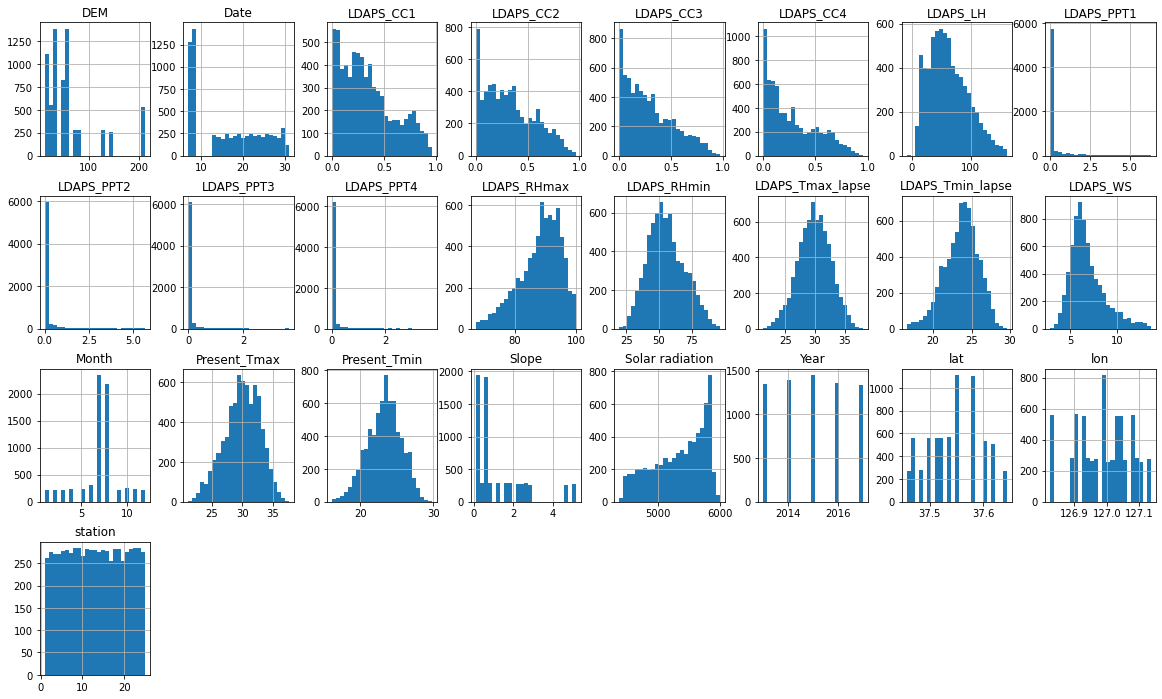

In [393]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: Column LDAPS_CC1, LDAPS_CC2, LDAPS_CC3 LDAPS_CC4 are right skewed data. Where are columns Solar radiation are left skewed. Also columns LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Present_Tmax and Present_Tmin are normaly distributed.   

In [394]:
x.skew()

station             0.002824
Date                0.255377
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            1.088575
LDAPS_LH            0.569060
LDAPS_CC1           0.595343
LDAPS_CC2           0.501691
LDAPS_CC3           0.700518
LDAPS_CC4           0.711008
LDAPS_PPT1          3.723069
LDAPS_PPT2          4.859920
LDAPS_PPT3          5.479300
LDAPS_PPT4          5.926613
lat                 0.108039
lon                -0.275324
DEM                 1.765466
Slope               1.595105
Solar radiation    -0.505080
Month              -0.683268
Year                0.011207
dtype: float64

In [395]:
#Removing skeweness

from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method= 'yeo-johnson', standardize= True)

for i in x.columns:
    x[i]= pt.fit_transform(x[i].values.reshape(-1,1))

In [396]:
x.skew()

station            -0.201843
Date               -0.034349
Present_Tmax       -0.031857
Present_Tmin       -0.021828
LDAPS_RHmin        -0.013769
LDAPS_RHmax        -0.098555
LDAPS_Tmax_lapse   -0.011175
LDAPS_Tmin_lapse   -0.025182
LDAPS_WS            0.006047
LDAPS_LH           -0.029450
LDAPS_CC1           0.062784
LDAPS_CC2           0.047112
LDAPS_CC3           0.090291
LDAPS_CC4           0.137827
LDAPS_PPT1          1.549961
LDAPS_PPT2          1.738631
LDAPS_PPT3          1.903125
LDAPS_PPT4          2.159766
lat                 0.000000
lon                -0.189265
DEM                 0.038756
Slope               0.234034
Solar radiation    -0.166097
Month               0.040224
Year                0.000000
dtype: float64

In [397]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month,Year
0,-1.870804,1.419421,-0.481034,-0.847763,0.256449,0.349021,-0.675185,-0.358361,0.171472,0.348427,...,-0.497816,-0.475038,-0.427723,0.0,-0.020222,1.855030,1.330634,1.889143,-0.583864,0.0
1,-1.658216,1.419421,0.668075,-0.765885,-0.176798,0.261167,-0.031595,0.110823,-0.583341,-0.171766,...,-0.497816,-0.475038,-0.427723,0.0,0.503049,0.070309,-0.373363,1.434143,-0.583864,0.0
2,-1.464130,1.419421,0.554825,-0.045262,-0.447909,-0.725632,0.056766,0.364465,-0.259520,-1.388700,...,-0.497816,-0.475038,-0.427723,0.0,0.841253,-0.352909,-0.942761,1.413799,-0.583864,0.0
3,-1.282735,1.419421,0.706080,-0.001504,0.255332,1.384801,-0.085097,-0.215784,-0.615638,0.243635,...,-0.497816,-0.475038,-0.427723,0.0,0.374295,0.099376,1.252120,1.390598,-0.583864,0.0
4,-1.110853,1.419421,0.479961,-0.641918,0.108784,0.185439,-0.300399,-0.143137,-0.550428,1.304063,...,-0.497816,-0.475038,-0.427723,0.0,1.872664,-0.278275,-0.389897,1.399694,-0.583864,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883,1.075891,1.419421,-2.182337,-2.215774,-2.639267,-1.377127,-0.768545,-2.146438,0.042244,-2.024327,...,-0.497816,-0.475038,-0.427723,0.0,0.606580,-0.712475,-0.266692,-1.769638,0.357264,0.0
6884,1.193795,1.419421,-2.341524,-2.355267,-2.070860,-0.761998,-1.160304,-2.300051,-0.525425,0.686638,...,-0.497816,-0.475038,-0.427723,0.0,1.211103,-0.999203,-1.353296,-1.787610,0.357264,0.0
6885,1.310336,1.419421,-2.128289,-2.458225,-2.416415,-1.315434,-1.283739,-1.992365,-0.252196,0.420156,...,-0.497816,-0.475038,-0.427723,0.0,-1.246488,-1.576420,-1.277985,-1.785711,0.357264,0.0
6886,1.425587,1.419421,-2.128289,-2.250884,-2.711681,-1.471606,-1.052974,-2.006332,0.004869,-0.325115,...,-0.497816,-0.475038,-0.427723,0.0,-1.030876,-1.397274,-1.067963,-1.791913,0.357264,0.0


In [398]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Finding best model for Next_Tmax

In [399]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y_max, test_size=.2, random_state=i)
    lm= LinearRegression()
    lm.fit(x_train, y_train)
    pred_lm= lm.predict(x_test)
    acc= r2_score(y_test, pred_lm)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.7773793378623876
335


In [400]:
x_train, x_test, y_train, y_test= train_test_split(x,y_max, test_size=.2, random_state=335)

In [401]:
lm= LinearRegression()
ls= Lasso()
rd= Ridge()
enr= ElasticNet()
svr= SVR()
dtc= DecisionTreeRegressor()
knn= KNeighborsRegressor()
adr= AdaBoostRegressor()
rfr= RandomForestRegressor()
gbr= GradientBoostingRegressor()

models= [lm,ls,rd,enr,svr,dtc,knn,adr,rfr,gbr]

for m in models:
    print(m, '- R2_Score')
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))
    print()

LinearRegression() - R2_Score
0.7773793378623876

Lasso() - R2_Score
0.5428111448189585

Ridge() - R2_Score
0.7773818427162142

ElasticNet() - R2_Score
0.6106398411798124

SVR() - R2_Score
0.888614684408611

DecisionTreeRegressor() - R2_Score
0.757955083788746

KNeighborsRegressor() - R2_Score
0.8789111618707269

AdaBoostRegressor() - R2_Score
0.7735703602296646

RandomForestRegressor() - R2_Score
0.9051162620003655

GradientBoostingRegressor() - R2_Score
0.8551408989759005



In [402]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_lm= cross_val_score(m, x,y_max, cv=5)
    print('CV score of ',m,  scr_lm.mean())

CV score of  LinearRegression() 0.6636248386848117
CV score of  Lasso() 0.4737642909847448
CV score of  Ridge() 0.6636596135799436
CV score of  ElasticNet() 0.5252180262621373
CV score of  SVR() 0.6286186456086267
CV score of  DecisionTreeRegressor() 0.3965222548799616
CV score of  KNeighborsRegressor() 0.5227972872103621
CV score of  AdaBoostRegressor() 0.6355284462571229
CV score of  RandomForestRegressor() 0.6607118723663026
CV score of  GradientBoostingRegressor() 0.6801098121080229


Observations: From above we can observe that for RandomForestRegressor model there is less difference in r2_score and cross validation r2_score so we will select RandomForestRegressor model for final predictions.

In [403]:
#Hyperparameter Tuning for Best selected model  RandomForestRegressor

from sklearn.model_selection import GridSearchCV

parameters= {'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4,],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]}

GSV= GridSearchCV(rfr, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [404]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.8979039041856303
Mean absolute error: 0.7392665321273217
Mean squared error:  0.898365607032097
Root mean squared error:  0.947821505892379


In [405]:
#Saving the Model for Next_Tmax
import joblib

joblib.dump(GSV.best_estimator_, 'Temperature_Next_Tmax_Forecast_best_rfr_model.obj')

['Temperature_Next_Tmax_Forecast_best_rfr_model.obj']

# Finding best model for Next_Tmin

In [406]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y_min, test_size=.2, random_state=i)
    lm= LinearRegression()
    lm.fit(x_train, y_train)
    pred_lm= lm.predict(x_test)
    acc= r2_score(y_test, pred_lm)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.8325868981359164
335


In [407]:
x_train, x_test, y_train, y_test= train_test_split(x,y_min, test_size=.2, random_state=335)

In [408]:
lm= LinearRegression()
ls= Lasso()
rd= Ridge()
enr= ElasticNet()
svr= SVR()
dtc= DecisionTreeRegressor()
knn= KNeighborsRegressor()
adr= AdaBoostRegressor()
rfr= RandomForestRegressor()
gbr= GradientBoostingRegressor()

models= [lm,ls,rd,enr,svr,dtc,knn,adr,rfr,gbr]

for m in models:
    print(m, '- R2_Score')
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))
    print()

LinearRegression() - R2_Score
0.8325868981359164

Lasso() - R2_Score
0.5888065320307503

Ridge() - R2_Score
0.8325902337525097

ElasticNet() - R2_Score
0.6680612067878442

SVR() - R2_Score
0.9114965092371432

DecisionTreeRegressor() - R2_Score
0.7633088554134391

KNeighborsRegressor() - R2_Score
0.8655237057090666

AdaBoostRegressor() - R2_Score
0.8045256948843763

RandomForestRegressor() - R2_Score
0.9080137430240506

GradientBoostingRegressor() - R2_Score
0.8933512740347254



In [409]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_lm= cross_val_score(m, x,y_min, cv=5)
    print('CV score of ',m,  scr_lm.mean())

CV score of  LinearRegression() 0.7528160361136044
CV score of  Lasso() 0.5119825878958256
CV score of  Ridge() 0.7528324813006444
CV score of  ElasticNet() 0.5888886225451593
CV score of  SVR() 0.7073215404776814
CV score of  DecisionTreeRegressor() 0.5576901892303283
CV score of  KNeighborsRegressor() 0.5485865469604161
CV score of  AdaBoostRegressor() 0.72264999847669
CV score of  RandomForestRegressor() 0.7675093541518112
CV score of  GradientBoostingRegressor() 0.7798345384015608


Observations: From above we can observe that for RandomForestRegressor model there is less difference in r2_score and cross validation r2_score so we will select RandomForestRegressor model for final predictions.

In [410]:
#Hyperparameter Tuning for Best selected model  RandomForestRegressor

from sklearn.model_selection import GridSearchCV

parameters= {'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4,],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]}

GSV= GridSearchCV(rfr, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [411]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.8990348016532221
Mean absolute error: 0.5931351389552983
Mean squared error:  0.5667250573776933
Root mean squared error:  0.752811435472186


In [412]:
#Saving the Model for Next_Tmin
import joblib

joblib.dump(GSV.best_estimator_, 'Temperature_Next_Tmin_Forecast_best_rfr_model.obj')

['Temperature_Next_Tmin_Forecast_best_rfr_model.obj']

Conclusion: For Temperature_Forecast_Analysis we have selected RandomForestRegressor model which having accuracy 90% for both Next_Tmax and Next_Tmin.
